# Formation PYTORCH


Lien de la formation : "https://automatants.cs-campus.fr/formation/2021_Intro_Pytorch"

Pytorch en quelques mots : <br>
- Un backend pour le machine learning <br>
- Importe des tenseurs (matrices) <br>
- Permet de faire des descentes de gradient facilement <br>
- Une librairie python <br>
- Différences avec Tensorflow : PyTorch utilise les objets natifs de python et est séquentiel (point par point alors que Tensorflow est compilé), PyTorch est dynamique mais moins rapide, PyTorch est plus populaire chez les chercheurs, PyTorch ne dispose pas d'API de haut niveau. Les deux font la même chose ! 

## Cas d'utilisation : MNIST 
Classification, sujet classique. 

In [16]:
## Imports 

import torch 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from torch import nn 
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 

In [17]:
## Backpropagation avec PyTorch 

x = torch.tensor(3.,requires_grad=True) # Track de gradient 
y = torch.tensor(3.,requires_grad=True)

# On a nos paramètres x et y et on veut changer nos paramètres 
# de façon à minimiser la loss 


def f(x,y): 
    return x**2 + y**2 

# On va chercher à minimiser cette fonction 

res = f(x,y)

res.backward()

### MAJ de x : descente de gradient
# learning rate : 
lr = 1e-1

# Opération qui n'est pas possible 
# x -= lr * x.grad
# y -= lr * y.grad

# Il faut saisir 
with torch.no_grad():
    x -= lr * x.grad
    y -= lr * y.grad

for _ in range(200):
    res = f(x,y) 
    res.backward()
    with torch.no_grad():
        x -= lr * x.grad
        y -= lr * y.grad
    x.grad.zero_() # remise à zéro du gradient qui est super importante sinon les gradients s'aditionnent 
    y.grad.zero_()

print(f'x={x}, y = {y}, \n res = {f(x,y)}')

x=6.846699299663e-20, y = 6.846699299663e-20, 
 res = 9.375457440488405e-39


Apperçu des dimensions : torch.Size([32, 1, 28, 28]) torch.Size([32])


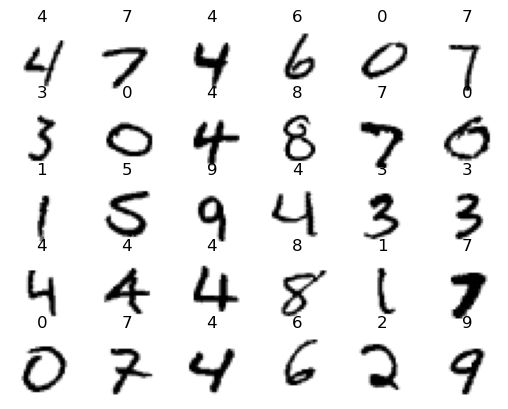

In [18]:
## MNIST 

# Charger les données du MNIST sur notre ordinateur 
t = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])
### Compose est utilisée pour regrouper plusieurs transformations ensemble.

train_loader = DataLoader(datasets.MNIST('./data', train=True, transform=t, download=True),
                          batch_size=32, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, transform=t, download=True),
                         batch_size=32, shuffle=False)

for data_batch, label_batch in train_loader: 
    print("Apperçu des dimensions :", data_bacth.size(), label_batch.size())
    fig = plt.figure()
    for i in range(1,31): 
        data = data_batch[i,0]
        label = label_batch[i]
        plt.subplot(5,6, i)
        plt.title(f'{label}')
        plt.axis('off')
        plt.imshow(data , cmap ='gray_r')
    break
plt.show()

In [27]:
# Création d'un ensemble de réseau de neurones particulier 
## Et on va en prendre un qui appartient à cette classe 

class Dense(nn.Module):

    def __init__(self): 
        super(Dense,self).__init__()
        self.layer1 = nn.Linear(28*28,64)
        self.layer2 = nn.Linear(64,10)
        self.init_weights() 

    def init_weights(self):
        for p in self.parameters():
            if p.ndim==1:
                nn.init.normal_(p) # underscore pour dire que ça modifie en place 
            else: 
                nn.init.kaiming_normal_(p)
            
    def forward(self,x):
        x = x.view((-1,28*28))   #reshape // -1 pour dire que je ne m'occupe pas de cette dimension 
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x))
        return x
    


model = Dense()
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss() #Fonction cout 
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) #technique de descente de gradient 


def accuracy(proba_batch, label_batch):
    correct = 0
    batch_size = label_batch.size(0)
    preds = torch.argmax(proba_batch, dim=-1)
    for i, pred in enumerate(preds):
        if pred==label_batch[i]:
            correct +=1
    return correct / batch_size

N_EPOCHS = 1

for epoch in range(N_EPOCHS):
    print(f'epoch : {epoch}/{N_EPOCHS}')

    for batch, (data_bach, label_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        pred_batch = model(data_batch)
        loss = criterion(pred_batch, label_batch)
        loss.backward()
        optimizer.step() #maj des poids automatique 
        acc = accuracy(pred_batch, label_batch)
        print(f'\r batch {batch}/{60000//32} \n loss = {loss: .3}  \n accuracy = {acc: .3}', end = '')
    
    print()

# loop validation 
loss = 0
acc = 0 
batch=0
for (data_bach, label_batch) in enumerate(test_loader):
    batch +=1
    with torch.no_grad(): 
        pred_batch = model(data_batch)
        loss += criterion(pred_batch, label_batch)
        acc = acc + accuracy(pred_batch, label_batch)
loss = loss / batch
acc = acc / batch

print(f'valid_loss = {loss: .3}  \n valid_accuracy = {acc: .3} ')

epoch : 0/1
 batch 0/1875 
 loss =  2.37  
 batch 1/1875 .0938
 loss =  2.35  
 batch 2/1875 .0625
 loss =  2.37  
 batch 3/1875 .0625
 loss =  2.38  
 batch 4/1875 .0
 loss =  2.32  
 batch 5/1875 .0938
 loss =  2.3  
 batch 6/1875 .188
 loss =  2.33  
 batch 7/1875 .0312
 loss =  2.27  
 batch 8/1875 .219
 loss =  2.33  
 batch 9/1875 .125
 loss =  2.31  
 batch 10/1875 0938
 loss =  2.33  
 batch 11/1875 0938
 loss =  2.36  
 batch 12/1875 0312
 loss =  2.33  
 batch 13/1875 0312
 loss =  2.29  
 batch 14/1875 125
 loss =  2.28  
 batch 15/1875 0938
 loss =  2.31  
 batch 16/1875 125
 loss =  2.33  
 batch 17/1875 125
 loss =  2.36  
 batch 18/1875 0312
 loss =  2.25  
 batch 19/1875 156
 loss =  2.35  
 batch 20/1875 0625
 loss =  2.28  
 batch 21/1875 25
 loss =  2.35  
 batch 22/1875 0312
 loss =  2.31  
 batch 23/1875 0938
 loss =  2.32  
 batch 24/1875 125
 loss =  2.35  
 batch 25/1875 0625
 loss =  2.34  
 batch 26/1875 125
 loss =  2.33  
 batch 27/1875 125
 loss =  2.33  
 

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_4037/976045600.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.layer2(x))


 batch 40/1875 
 loss =  2.3  
 batch 41/1875 0938
 loss =  2.35  
 batch 42/1875 0625
 loss =  2.29  
 batch 43/1875 125
 loss =  2.24  
 batch 44/1875 25
 loss =  2.34  
 batch 45/1875 0625
 loss =  2.31  
 batch 46/1875 0625
 loss =  2.36  
 batch 47/1875 0312
 loss =  2.34  
 batch 48/1875 0625
 loss =  2.27  
 batch 49/1875 156
 loss =  2.29  
 batch 50/1875 156
 loss =  2.29  
 batch 51/1875 156
 loss =  2.33  
 batch 52/1875 0625
 loss =  2.3  
 batch 53/1875 156
 loss =  2.31  
 batch 54/1875 125
 loss =  2.36  
 batch 55/1875 0625
 loss =  2.32  
 batch 56/1875 0938
 loss =  2.27  
 batch 57/1875 188
 loss =  2.35  
 batch 58/1875 0625
 loss =  2.36  
 batch 59/1875 0625
 loss =  2.3  
 batch 60/1875 0938
 loss =  2.25  
 batch 61/1875 156
 loss =  2.34  
 batch 62/1875 0938
 loss =  2.31  
 batch 63/1875 125
 loss =  2.34  
 batch 64/1875 0625
 loss =  2.36  
 batch 65/1875 0625
 loss =  2.4  
 batch 66/1875 0
 loss =  2.27  
 batch 67/1875 156
 loss =  2.33  
 batch 68/1875 

TypeError: cross_entropy_loss(): argument 'target' (position 2) must be Tensor, not list